In [345]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('seaborn-white')
import random

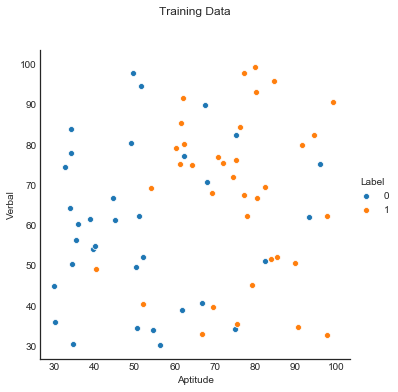

In [363]:
#Data Preparation and Data Visualization
q1train =  pd.read_excel('q1train.xlsx')
f = sns.pairplot(x_vars=["Aptitude"], y_vars=["Verbal"], data=q1train, hue="Label", height=5)
f.fig.suptitle("Training Data", y=1.08)
f.savefig('train.png')
X = np.array(q1train[['Aptitude','Verbal']].copy()).reshape(-1,2)
y = np.array(q1train[['Label']].copy()).reshape(-1,1)
y = np.where(y==0,-1,1)

In [347]:
# Defining Perceptron Class with signum function as activation, alpha as learning rate and epochs as iterations
class Perceptron(object):

    def __init__(self, alpha=0.01, epochs=50):
        self.eta = alpha
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

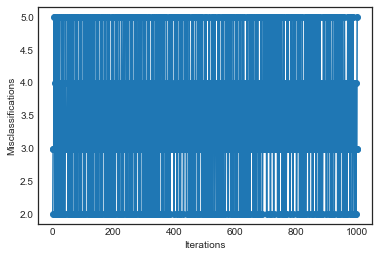

In [348]:
ppn = Perceptron(epochs=1000, alpha=0.1)
ppn.train(X,y)
ppn.w_
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [349]:
print ("No. of misclassifications:", ppn.errors_[-1])
print("Weights after Perceptron Training :",ppn.w_)


No. of misclassifications: 5
Weights after Perceptron Training : [-198.49910652   14.43230574   15.37091822]


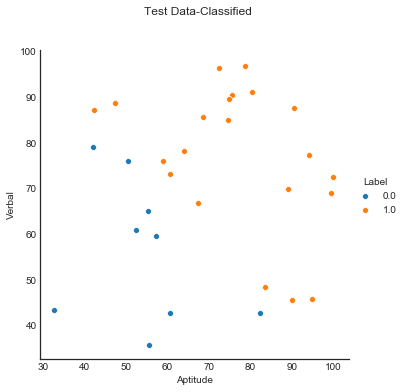

In [364]:
# Classification of Test Data using Perceptron Weights
q1test = pd.read_excel('q1test.xlsx')
X = np.array(q1test[['Aptitude','Verbal']].copy()).reshape(-1,2)
y_n = np.dot(X, ppn.w_[1:]) + ppn.w_[0]
y_n = np.where(y_n >= 1750, 1,0)
y_n = pd.DataFrame(y_n)
output = pd.DataFrame(np.hstack((X,y_n)))
output.columns = ['Aptitude', 'Verbal', 'Label']
output.to_csv('Output.csv')
f = sns.pairplot(x_vars=["Aptitude"], y_vars=["Verbal"], data=output, hue="Label", height=5)
f.fig.suptitle("Test Data-Classified", y=1.08)
f.savefig('test.png')